# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


SUMMARY:
A random set of 600 cities were chosen around the globe, with a sufficient number along the equator, especially in south pacific Asia (as can be seen in my global map Lat_Long_v_maxTemp chart). Date was obtained fro the OpenWeatherMap API  at 11:00 PM 8/30/19 Pacific Time.  The homework question is, "What's the weather like as we approach the equator?"  is it hotter etc…  Well the answer is yes, the closer you get to the Equator the hotter it gets. Further analysis was performed on humidity, cloudiness, and wind speed readings. 

TEMPS:
My chart Latitude vs Max Temp shows a clear arc with lower max temps seen in both the lower ( -80 to -20 Lat) and higher latitudes (20 to 80 Lat) with higher temps seen the middle latitudes ( -20 to 20 Lat).  Within the equatorial zone (-23.5 to 23.5 Lat) the majority of max temperatures are between 70 degrees to 95 degrees Fahrenheit. Cities with max temps above 90 degrees (f) are only seen between -20 and 45 degrees latitude, as it is generally summer for the northern hemisphere and winter for the southern. The hottest cities (roughly a hand full) are between between 20-40 Lat, with highest number of cities with max temps between 90-100 (f). Generally, the majority of cities at latitudes above 40 degrees do not see a max temp above 70, and overall max temp range is from 35-98 degrees (f). Whereas the equatorial cities see a max temp range from 55-95 degrees (f). One thing to note, the data may represent more cities in latitudes outside the equator as the bulk of data appears to be from latitudes 20+ but the bulk of those cities high temps are below 70 degrees. A fairer comparison would be to choose an equal number of cities in the equatorial zone, northern and southern hemispheres. 

HUMIDITY:
The majority of cities in this data set experienced more than 50% humidity!   This data was extracted later in the evening so perhaps dew and fog played a factor for half the cities. Within the equatorial zone there does Not seem to be significant clustering. A rough observation of the charted data appears to show an average humidity of 80% in the equatorial zone. Some significant concentrated clustering is seen in the 40-60 latitude with humidity between 80-100%. 

CLOUDINESS:
Referring to the Cloudiness chart, three major clusters of cities are seen at  0, 75, and 100 cloudiness percentage,  with no distinguishable influence from a city’s latitude. Without pulling exact numbers, of the three noted categories; category 0 is the largest, category 75 is the middle, and category 100 is the smallest.  The equatorial zone participates in all these categories but does not appear to have any significant result compared to the other latitudes.  Overall the world looks more cloudy than clear!

WINDSPEED:
Referring to the Wind Speed Chart, max wind speeds are mostly clustered in the range from 0 to 10 mph. Only 4-6 cities had a max wind speed of above 25 mph. And maybe 100 cities experienced max windspeeds of 10-25 mph. At the date and time this data was extracted the global winds for 600 cities was rather calm!


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
#cities = []
country_ls = []
city_country = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
counter = 0
#I DEACTIVATED CODE BELOW ONCE I HAD AT LEAST 500 ENTRIES IN THE LIST 
for lat_lng in lat_lngs:
    counter +=1
    if counter <=300 :
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        countrys = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
   
    #If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
            country_ls.append(countrys)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities)
#print(country_ls)
#city_country = zip(cities, country_ls)
#city_prt = set(city_country)
#print(city_prt)

657
{('sakaiminato', 'br'), ('kansanshi', 'ru'), ('bambous virieux', 'ru'), ('port hardy', 'ir'), ('leningradskiy', 'br'), ('menongue', 'vn'), ('avera', 'us'), ('sumenep', 'us'), ('puerto ayora', 'ar'), ('vanimo', 'mm'), ('butaritari', 'ar'), ('paraiso', 'kz'), ('chinchani', 'py'), ('ngunguru', 'au'), ('mehamn', 'ke'), ('oksfjord', 'gl'), ('vaini', 'cn'), ('mana', 'gh'), ('lebu', 'sy'), ('sentyabrskiy', 'ar'), ('vila franca do campo', 'br'), ('mys shmidta', 'ru'), ('longyearbyen', 'no'), ('north platte', 'ir'), ('castro', 'us'), ('saldanha', 'in'), ('kodiak', 'ru'), ('riyadh', 'ru'), ('wagar', 'ru'), ('nabire', 'mm'), ('tautira', 'ru'), ('hermanus', 'gb'), ('kavieng', 'ca'), ('biograd na moru', 'no'), ('namibe', 'gf'), ('mataura', 'ng'), ('marcona', 'ie'), ('jamestown', 'bm'), ('te anau', 'de'), ('kuytun', 'py'), ('victoria', 'us'), ('bredasdorp', 'ru'), ('ushuaia', 'au'), ('vestmannaeyjar', 'pa'), ('saint-philippe', 'ru'), ('sao filipe', 'tz'), ('kaeo', 'id'), ('lagoa', 'cn'), ('taola

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key= '6a312e92bd6c5aa03ae7974f7f21d4fc'
limit = 0 
city_name_ls = []
cloudiness_ls = []   
country_ls = []  
date_ls = []       
humidity_ls = []  
lat_ls = []          
lng_ls = []         
max_Temp_ls = []   
wind_Speed_ls = []  
units = 'imperial'
for item in cities :
#for item in city_prt : 
    #limit +=1 
    #if limit <= 3 :       
        # api.openweathermap.org/data/2.5/weather?q={city name}
        # api.openweathermap.org/data/2.5/weather?q={city name},{country code}
        #query_url = f"{url}appid={api_key}&q={city}&units={units}"
        #query_url = f"{url}appid={api_key}&q={city},{country}"
        print(str(item))
        query_url = f"{url}appid={api_key}&q={item}&units={units}"
        weather_response = requests.get(query_url)
        #response = requests.get(query_url)
        data1jp = weather_response.json()
        #x = weather_response.json() 
        if data1jp["cod"] != "404":  # if we get a match for city add data to lists
            #    data1jp = weather_response.json() 
            # Get weather data
            #print(requests.get(query_url))
            # A GOOD RESOURCE FOR 404 ERRORS
            # https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
           # data1jp = weather_response.json()
            city_name_ls.append(data1jp['name'])
            date_ls.append(data1jp["dt"])
            country_ls.append(data1jp['sys']['country'])
            cloudiness_ls.append(data1jp['clouds']['all'])   
            humidity_ls.append(data1jp['main']['humidity']  )
            lat_ls.append(data1jp['coord']['lat']  )       
            lng_ls.append(data1jp['coord']['lon']  )    
            max_Temp_ls.append(data1jp['main']['temp_max']  )
            wind_Speed_ls.append(data1jp['wind']['speed'])
        else: 
              print(" City Not Found ") 
#print(date_ls)
#print(country_ls)
#print(max_Temp_ls)
#pprint(data1jp)       

bambous virieux
puerto ayora
cape town
cherskiy
tiksi
kavieng
bluff
kaeo
victoria
hilo
rotterdam
upernavik
pacific grove
arraial do cabo
punta arenas
barrow
maceio
kodiak
taoudenni
hermanus
biograd na moru
flinders
leningradskiy
menongue
ushuaia
norman wells
mataura
longyearbyen
sumenep
anadyr
nikolskoye
vaini
tautira
namibe
isangel
busselton
coos bay
chinchani
tuktoyaktuk
lorengau
riyadh
rikitea
jamestown
muros
sakaiminato
chokurdakh
taolanaro
 City Not Found 
portland
butaritari
fairbanks
sitka
nabire
lebu
avera
oksfjord
kuytun
vila franca do campo
vanimo
mehamn
sao filipe
lagoa
saint-philippe
gurgan
 City Not Found 
paraiso
vestmannaeyjar
majene
lokoja
corowa
khatanga
sentyabrskiy
 City Not Found 
albany
wagar
vardo
port hardy
mys shmidta
 City Not Found 
north platte
saint-dizier
mana
tiarei
saldanha
castro
stutterheim
kalmunai
dunedin
manta
new norfolk
marcona
 City Not Found 
kansanshi
te anau
atar
barentsburg
 City Not Found 
talnakh
halalo
 City Not Found 
nalut
ngunguru
bredas

In [46]:
weather_table =  pd.DataFrame({ 
                                'City'        : city_name_ls   ,
                                'Cloudiness'  : cloudiness_ls  ,
                                'Country'     : country_ls  , 
                                'Date'        : date_ls  , 
                                'Humidity'    : humidity_ls , 
                                'Lat'         : lat_ls   , 
                                'Lng'         : lng_ls    , 
                                'Max Temp'    : max_Temp_ls  , 
                                'Wind Speed'  : wind_Speed_ls 
                            })
weather_table.shape

(600, 9)

SAMPLE JSON PER CITY
felanitx
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.47, 'lon': 3.15},
 'dt': 1567218196,
 'id': 2517750,
 'main': {'humidity': 88,
          'pressure': 1016,
          'temp': 296.43,
          'temp_max': 297.59,
          'temp_min': 294.82},
 'name': 'Felanitx',
 'sys': {'country': 'ES',
         'id': 6423,
         'message': 0.0071,
         'sunrise': 1567228474,
         'sunset': 1567275695,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 1.5}}

In [50]:
print(data1jp)

{'coord': {'lon': -54.34, 'lat': -34.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.53, 'pressure': 1017.73, 'humidity': 89, 'temp_min': 42.53, 'temp_max': 42.53, 'sea_level': 1017.73, 'grnd_level': 1004.33}, 'wind': {'speed': 4.07, 'deg': 243.632}, 'clouds': {'all': 59}, 'dt': 1567230147, 'sys': {'message': 0.0068, 'country': 'UY', 'sunrise': 1567245480, 'sunset': 1567286279}, 'timezone': -10800, 'id': 3440777, 'name': 'Rocha', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_table.head()
weather_table.to_csv("weather_equator.csv", encoding="utf-8", index=False, header=True)

In [13]:
globe_weather = pd.read_csv("weather_equator.csv")
%matplotlib inline
import matplotlib.image as mpimg
img = mpimg.imread('../Images/equatorsign.png')

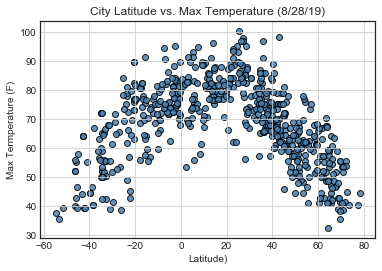

In [99]:
with plt.style.context(('seaborn-white')):  # !! -- I NOW RUN JUPYTER NOTEBOOK DARK MODE AND HAVE TO SET WHITE BACKGROUNDS FOR MY CHARTS -- !!
        plt.scatter(   globe_weather['Lat'], globe_weather['Max Temp'], c='steelblue',  alpha= .85, edgecolor = 'k', linewidth=1, zorder=-1 )
        # zorder determins the depth of what is displayed, scatter z -1 ,scatter appears behind other elments like grid,  z=1 above all elements
        plt.grid()
        plt.title("City Latitude vs. Max Temperature (8/28/19)", clip_on =True) # TITLE OF CHART
        plt.xlabel("Latitude)")  # LABEL THE X AXIS
        plt.ylabel("Max Termperature (F)") # LABEL THE Y AXIS
        plt.autoscale()# make chart fit any cell or window size ,    #plt.tight_layout() # avoid overlapping labels 
        plt.savefig("WeathPy_Lat_v_Temp_BS.png")
        plt.show()
   

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

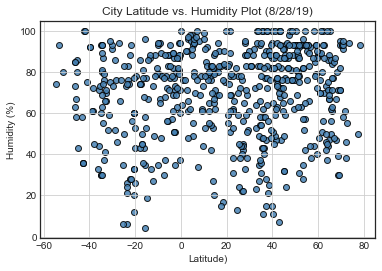

In [100]:
with plt.style.context(('seaborn-white')):  # !! -- I NOW RUN JUPYTER NOTEBOOK DARK MODE AND HAVE TO SET WHITE BACKGROUNDS FOR MY CHARTS -- !!
        plt.scatter(globe_weather['Lat'], globe_weather['Humidity'], c='steelblue',  alpha= .85, edgecolor = 'k', linewidth=1,zorder=-1 )
        plt.grid()
        plt.title("City Latitude vs. Humidity Plot (8/28/19)", clip_on =True) # TITLE OF CHART
        plt.xlabel("Latitude)")  # LABEL THE X AXIS
        plt.ylabel("Humidity (%)") # LABEL THE Y AXIS
        plt.autoscale()# make chart fit any cell or window size ,    #plt.tight_layout() # avoid overlapping labels 
        plt.savefig("WeathPy_Lat_v_Humidity_BS.png")
        plt.show()
    

#### Latitude vs. Cloudiness Plot

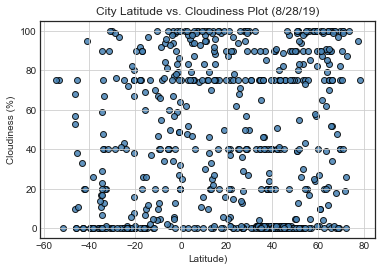

In [101]:
with plt.style.context(('seaborn-white')):  # !! -- I NOW RUN JUPYTER NOTEBOOK DARK MODE AND HAVE TO SET WHITE BACKGROUNDS FOR MY CHARTS -- !!
        plt.scatter(globe_weather['Lat'], globe_weather['Cloudiness'],c='steelblue',  alpha= .85,edgecolor = 'k', linewidth=1 ,zorder=-1 )
        plt.grid()
        plt.title("City Latitude vs. Cloudiness Plot (8/28/19)", clip_on =True) # TITLE OF CHART
        plt.xlabel("Latitude)")  # LABEL THE X AXIS
        plt.ylabel("Cloudiness (%)") # LABEL THE Y AXIS
        plt.autoscale()# make chart fit any cell or window size ,    #plt.tight_layout() # avoid overlapping labels 
        plt.savefig("WeathPy_Lat_v_Cloudiness_BS.png")
        plt.show()

#### Latitude vs. Wind Speed Plot

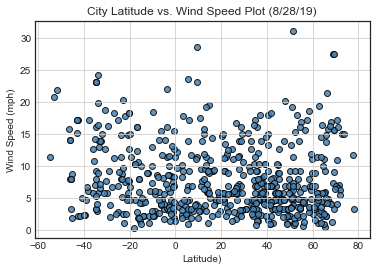

In [102]:
with plt.style.context(('seaborn-white')):  # !! -- I NOW RUN JUPYTER NOTEBOOK DARK MODE AND HAVE TO SET WHITE BACKGROUNDS FOR MY CHARTS -- !!
        plt.grid()
        plt.scatter(globe_weather['Lat'], globe_weather['Wind Speed'], c='steelblue',  alpha= .85, edgecolor = 'k', linewidth=1 ,zorder=-1 )
        plt.title("City Latitude vs. Wind Speed Plot (8/28/19)", clip_on =True) # TITLE OF CHART
        plt.xlabel("Latitude)")  # LABEL THE X AXIS
        plt.ylabel("Wind Speed (mph)") # LABEL THE Y AXIS
        plt.autoscale()# make chart fit any cell or window size ,    #plt.tight_layout() # avoid overlapping labels 

        plt.savefig("WeathPy_Lat_v_WindSpeed_BS.png")
        plt.show()

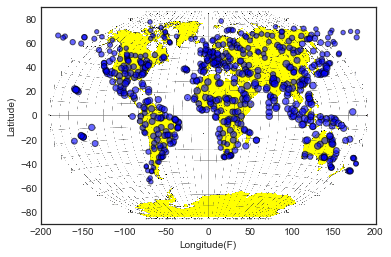

In [106]:
    #///BELOW ATTEMPT TO OVERLAY TEMP ON LONG LAT COORDS WITH MAP IMAGE PROVIDED
    #// It sort of worked with plotting long and lat points over most continents but the Temp circles were virtually indistinquishable
with plt.style.context(('seaborn-white')):     
        plt.scatter( globe_weather['Lng'],globe_weather['Lat'],  globe_weather['Max Temp']*.5, c='blue',    alpha= .6, edgecolor = 'k', linewidth=1 )
        plt.ylabel("Latitude)")  # LABEL THE X AXIS
        plt.xlabel("Longitude(F)") # LABEL THE Y AXIS    
        imgplot = plt.imshow(img, aspect='auto', extent=(-200,200,-90,90,), alpha=1, zorder=-1)
        plt.savefig("WeathPy_Lat_Long_V_MaxTemp_BS.png")
        plt.show()